In [1]:
from collections import namedtuple
import os.path

%matplotlib inline
from matplotlib import pyplot as plt
import numpy    as np
import pandas   as pd

In [2]:
top_path = '../Input/data.txt'

In [3]:
import sys
sys.path.insert(1, r'./../Python')
from helper import *

In [4]:

Data = namedtuple('Data', ['cpu', 'mem', 'key'])
Dataframe = namedtuple('Dataframe', ['cpu', 'mem'])

cpu, mem, key = parse(top_path)
data = Data(cpu, mem, key)

cpu, mem = create_dataframe(data.cpu, data.mem, data.key)

In [5]:
cpu.head()

,awk,cron,dhcpcd,docker-cont+,dockerd,grep,jbd2/mmcblk+,ksoftirqd/0,kswapd0,kworker/0:0,...,systemd-tim+,systemd-ude+,thd,tini,top,vncagent,vncserver-x+,w1_bus_mast+,wpa_supplic+,time
0,54.2,152.6,0.0,0.0,0.0,295.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.8,116.9,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.5,0.0,0.0,0.0,0.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.3,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35.3,0.0,0.0,35.3,0.0,1.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36.8,0.0,0.0,31.6,0.0,2.0


In [18]:
cpu.shape

(3896, 38)

In [6]:
cpu[cpu['awk'] > 0]

,awk,cron,dhcpcd,docker-cont+,dockerd,grep,jbd2/mmcblk+,ksoftirqd/0,kswapd0,kworker/0:0,...,systemd-tim+,systemd-ude+,thd,tini,top,vncagent,vncserver-x+,w1_bus_mast+,wpa_supplic+,time
0,54.2,152.6,0.0,0.0,0.0,295.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.8,116.9,0.0,0.0,0.0,0.0


In [7]:
cpu.mean().sort_values(ascending = False)[1:6]

top             34.355236
w1_bus_mast+     6.694533
main             4.222947
dockerd          1.517685
kworker/u2:3     1.262295
dtype: float64

In [8]:
def stack_plot(dataframe, labels, span = [100, 400],
               colors = ["#7bb274", "#a8a495", "#feb308", "#3778bf", "#825f87", '#d9544d', '#ffff7e', '#3b5b92']):
    
    plt.figure(figsize = (20, 14))
    
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[labels[0]][span[0]:span[1]], color = colors[0])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[labels[1]][span[0]:span[1]], color = colors[1])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[labels[2]][span[0]:span[1]], color = colors[2])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[labels[3]][span[0]:span[1]], color = colors[3])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[labels[4]][span[0]:span[1]], color = colors[4])
    
    plt.legend(labels = labels)

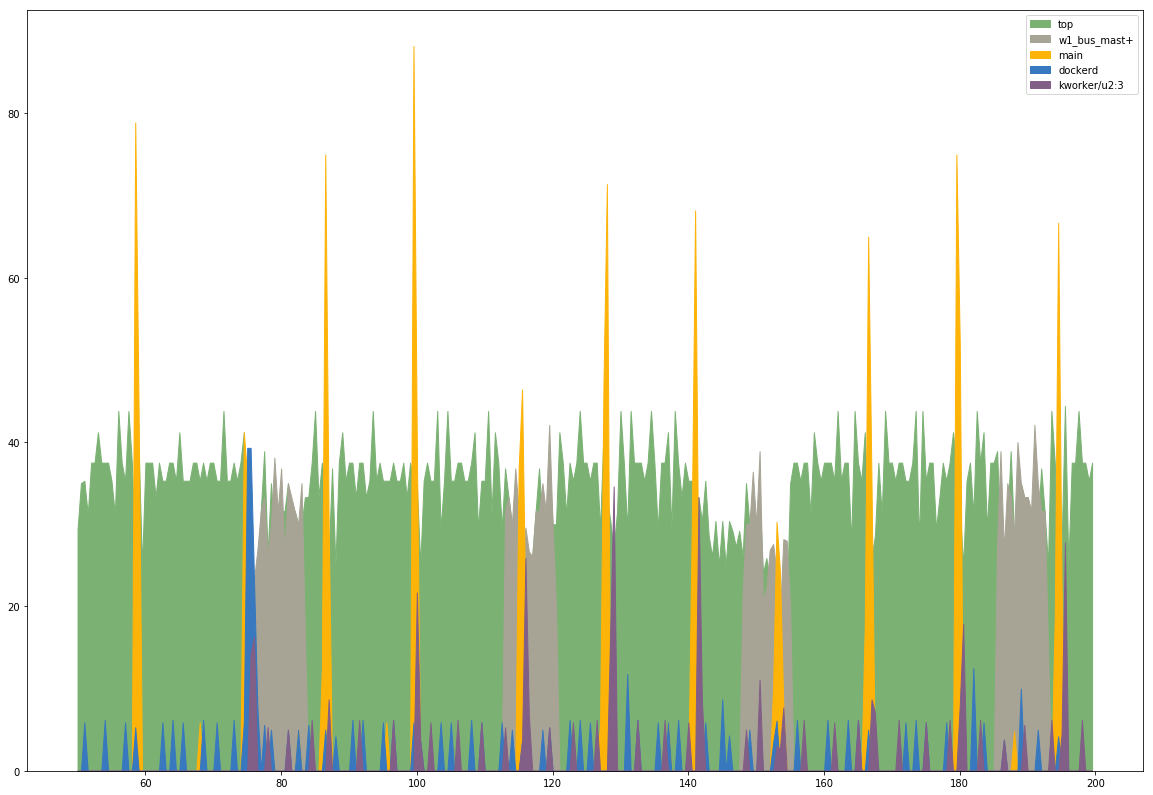

In [9]:
stack_plot(cpu, ['top', 'w1_bus_mast+', 'main', 'dockerd', 'kworker/u2:3'])
plt.show()

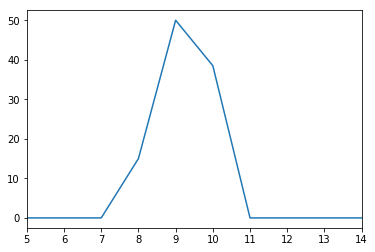

In [10]:
cpu['main'][5:15].plot()

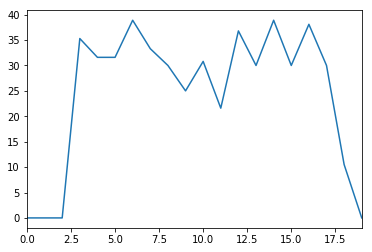

In [11]:
cpu['w1_bus_mast+'][0:20].plot()

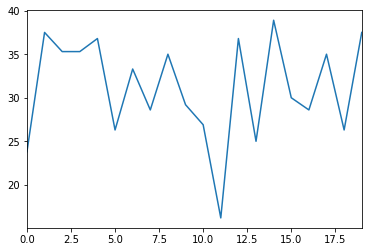

In [12]:
cpu['top'][0:20].plot()

In [13]:
mem.head()

,(sd-pam),agetty,avahi-daemon,awk,bash,cron,dbus-daemon,dhcpcd,docker-cont+,docker-proxy,...,systemd-log+,systemd-tim+,systemd-ude+,thd,tini,top,vncagent,vncserver-x+,wpa_supplic+,time
0,0.3,0.5,0.8,4.2,1.5,8.9,0.6,0.6,3.8,0.6,...,0.7,0.7,0.5,0.4,0.2,0.8,2.3,3.2,0.7,0.0
1,0.3,0.5,0.8,0.0,1.5,8.9,0.6,0.6,3.8,0.6,...,0.7,0.7,0.5,0.4,0.2,0.8,0.0,3.2,0.7,0.5
2,0.3,0.5,0.8,0.0,1.5,8.9,0.6,0.6,3.8,0.6,...,0.7,0.7,0.5,0.4,0.2,0.8,0.0,3.2,0.7,1.0
3,0.3,0.5,0.8,0.0,1.5,8.9,0.6,0.6,3.8,0.6,...,0.7,0.7,0.5,0.4,0.2,0.8,0.0,3.2,0.7,1.5
4,0.3,0.5,0.8,0.0,1.5,8.9,0.6,0.6,3.8,0.6,...,0.7,0.7,0.5,0.4,0.2,0.8,0.0,3.2,0.7,2.0


In [14]:
mem.mean().sort_values(ascending = False)[1:6]

dockerd         7.049538
docker-cont+    3.722947
vncserver-x+    3.200000
sshd            3.100000
systemd         2.000000
dtype: float64

In [15]:
mem['sshd']

0       3.1
1       3.1
2       3.1
3       3.1
4       3.1
5       3.1
6       3.1
7       3.1
8       3.1
9       3.1
10      3.1
11      3.1
12      3.1
13      3.1
14      3.1
15      3.1
16      3.1
17      3.1
18      3.1
19      3.1
20      3.1
21      3.1
22      3.1
23      3.1
24      3.1
25      3.1
26      3.1
27      3.1
28      3.1
29      3.1
       ... 
3866    3.1
3867    3.1
3868    3.1
3869    3.1
3870    3.1
3871    3.1
3872    3.1
3873    3.1
3874    3.1
3875    3.1
3876    3.1
3877    3.1
3878    3.1
3879    3.1
3880    3.1
3881    3.1
3882    3.1
3883    3.1
3884    3.1
3885    3.1
3886    3.1
3887    3.1
3888    3.1
3889    3.1
3890    3.1
3891    3.1
3892    3.1
3893    3.1
3894    3.1
3895    3.1
Name: sshd, Length: 3896, dtype: float64

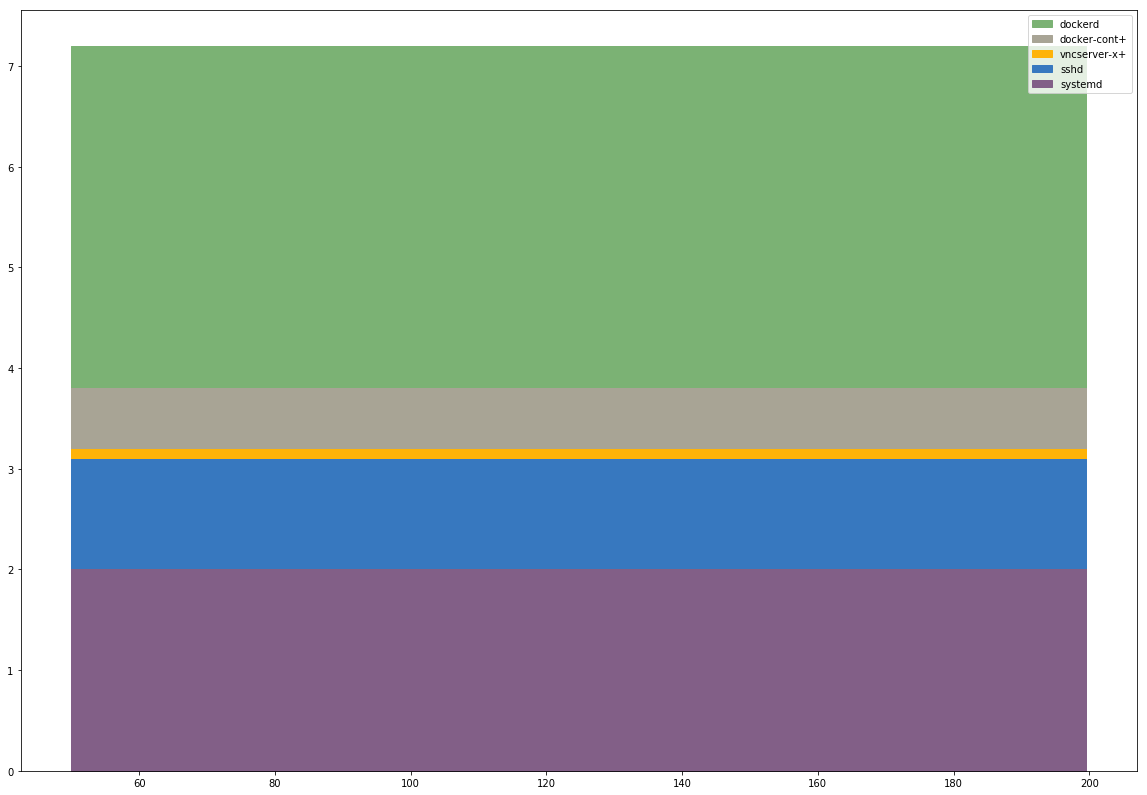

In [16]:
stack_plot(mem, ['dockerd', 'docker-cont+', 'vncserver-x+', 'sshd', 'systemd'])
plt.show()

In [17]:
cpu['main']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8       15.0
9       50.0
10      38.5
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
3866     0.0
3867     0.0
3868     0.0
3869     0.0
3870    41.2
3871    68.2
3872    11.5
3873     0.0
3874     0.0
3875     0.0
3876     0.0
3877     0.0
3878     0.0
3879     0.0
3880     0.0
3881     0.0
3882     0.0
3883     0.0
3884     0.0
3885     0.0
3886     0.0
3887     0.0
3888     0.0
3889     0.0
3890     0.0
3891     0.0
3892     0.0
3893     0.0
3894     0.0
3895     0.0
Name: main, Length: 3896, dtype: float64